In [3]:
#research q: Which arterial (chemical) related variables are most correlated to death in an ICU

In [4]:
#all modules used in code
import pandas as pd#dataframe manipulation module
import seaborn as sns#modelling module
import numpy as np#matrix representation of data and round
import matplotlib.pyplot as plt#graph modifier
#machine learning modules
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
icu=pd.read_csv('Preprocessed ICU data.csv')
icu=icu.sort_values(by=['Age','Height'],ascending=True)
#filter out all ICU patients except those with all values=0 on ICU types 2,3,4 for coronary icu
#merge both days' means into one single number for each reading of each patient
#filter by chemical readings in coronary ward
#end result top 3 chemically related variables found
#model relations with a suitable graph

In [5]:
icu.isna().sum().sum()#checks for missing data

0

In [6]:
icu.median()#find values of median for each variable to determine possible missing data as indicated in report

RecordID             137563.500000
Age                      74.000000
Gender                    1.000000
Height                  169.787227
ICUType2                  0.000000
                         ...      
Max_TroponinI.y           7.132683
Max_TroponinT.y           1.114629
SAPS.I                   16.000000
SOFA                      7.000000
In.hospital_death         0.000000
Length: 232, dtype: float64

In [7]:
chem=icu.filter(['RecordID', 'ICUType2', 'ICUType3',
       'ICUType4','Mean_Albumin.x','Mean_ALP.x','Mean_ALT.x','Mean_AST.x','Mean_BUN.x','Mean_Bilirubin.x',
        'Mean_Cholesterol.x','Mean_Creatinine.x',
        'Mean_K.x','Mean_Lactate.x','Mean_FiO2.x',
        'Mean_Mg.x','Mean_PaCO2.x','Mean_Glucose.x','Mean_Na.x', 
       'Mean_PaO2.x','Mean_SaO2.x','Mean_HCO3.x','Mean_pH.x',
        'Mean_Albumin.y','Mean_ALP.y','Mean_ALT.y','Mean_AST.y','Mean_BUN.y','Mean_Bilirubin.y',
        'Mean_Cholesterol.y','Mean_Creatinine.y','Mean_K.y','Mean_Lactate.y',
        'Mean_FiO2.y','Mean_Mg.y','Mean_PaCO2.y','Mean_Glucose.y','Mean_Na.y', 
       'Mean_PaO2.y','Mean_SaO2.y','Mean_HCO3.y','Mean_pH.y'],axis=1)#filters all irrelevant variables

In [8]:
chem_coro=chem[(chem.ICUType2==0)&(chem.ICUType3==0)&(chem.ICUType4==0)]#filters all patients not in coronary ICU

In [9]:
#unforunately, a for loop was not created so list was created for each variable
#the list for each variable contained the mean value of the averages recorded on each day for every patient
Albumin=chem_coro.filter(['Mean_Albumin.x','Mean_Albumin.y'])
Albumin_mean=list(Albumin.mean(axis=1))

ALP=chem_coro.filter(['Mean_ALP.x','Mean_ALP.y'])
ALP_mean=list(ALP.mean(axis=1))

ALT=chem_coro.filter(['Mean_ALT.x','Mean_ALT.y'])
ALT_mean=list(ALT.mean(axis=1))

AST=chem_coro.filter(['Mean_AST.x','Mean_AST.y'])
AST_mean=list(AST.mean(axis=1))

BUN=chem_coro.filter(['Mean_BUN.x','Mean_BUN.y'])
BUN_mean=list(BUN.mean(axis=1))

Bilirubin=chem_coro.filter(['Mean_Bilirubin.x','Mean_Bilirubin.y'])
Bilirubin_mean=list(Bilirubin.mean(axis=1))

Cholesterol=chem_coro.filter(['Mean_Cholesterol.x','Mean_Cholesterol.y'])
Cholesterol_mean=list(Cholesterol.mean(axis=1))

Creatinine=chem_coro.filter(['Mean_Creatinine.x','Mean_Creatinine.y'])
Creatinine_mean=list(Creatinine.mean(axis=1))

K=chem_coro.filter(['Mean_K.x','Mean_K.y'])
K_mean=list(K.mean(axis=1))

Lactate=chem_coro.filter(['Mean_Lactate.x','Mean_Lactate.y'])
Lactate_mean=list(Lactate.mean(axis=1))

FiO2=chem_coro.filter(['Mean_FiO2.x','Mean_FiO2.y'])
FiO2_mean=list(FiO2.mean(axis=1))

Mg=chem_coro.filter(['Mean_Mg.x','Mean_Mg.y'])
Mg_mean=list(Mg.mean(axis=1))

PaCO2=chem_coro.filter(['Mean_PaCO2.x','Mean_PaCO2.y'])
PaCO2_mean=list(PaCO2.mean(axis=1))

PaO2=chem_coro.filter(['Mean_PaO2.x','Mean_PaO2.y'])
PaO2_mean=list(PaO2.mean(axis=1))

Na=chem_coro.filter(['Mean_Na.x','Mean_Na.y'])
Na_mean=list(Na.mean(axis=1))

Glucose=chem_coro.filter(['Mean_Glucose.x','Mean_Glucose.y'])
Glucose_mean=list(Glucose.mean(axis=1))

SaO2=chem_coro.filter(['Mean_SaO2.x','Mean_SaO2.y'])
SaO2_mean=list(SaO2.mean(axis=1))

HCO3=chem_coro.filter(['Mean_HCO3.x','Mean_HCO3.y'])
HCO3_mean=list(HCO3.mean(axis=1))

pH=chem_coro.filter(['Mean_pH.x','Mean_pH.y'])
pH_mean=list(pH.mean(axis=1))

in_hospital_death=pd.DataFrame(icu[['In.hospital_death']])

In [10]:
#created dataframe with one dummy column, record ID
average_chem_coro = pd.DataFrame(chem_coro[['RecordID']])
#added all relevant lists as dataframe columns
average_chem_coro['Albumin']=Albumin_mean
average_chem_coro['ALP']=ALP_mean
average_chem_coro['ALT']=ALT_mean
average_chem_coro['AST']=AST_mean
average_chem_coro['BUN']=BUN_mean
average_chem_coro['Bilirubin']=Bilirubin_mean
average_chem_coro['Cholesterol']=Cholesterol_mean
average_chem_coro['Creatinine']=Creatinine_mean
average_chem_coro['K']=K_mean
average_chem_coro['Lactate']=Lactate_mean
average_chem_coro['FiO2']=FiO2_mean
average_chem_coro['Mg']=Mg_mean
average_chem_coro['PaCO2']=PaCO2_mean
average_chem_coro['PaO2']=PaO2_mean
average_chem_coro['Na']=Na_mean
average_chem_coro['Glucose']=Glucose_mean
average_chem_coro['SaO2']=SaO2_mean
average_chem_coro['HCO3']=HCO3_mean
average_chem_coro['pH']=pH_mean
average_chem_coro['in_hospital_death']=in_hospital_death

Text(0.5, 1.0, 'Correlations of arterial chemical features')

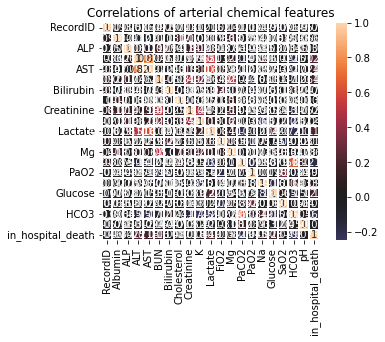

In [11]:
corr = average_chem_coro.corr()
sns.heatmap(corr, annot=True, center=0, square=True, linewidths=0.2);
plt.title('Correlations of arterial chemical features')#attempted to create heatmap
#higher res image available in reportm
#used as a quantifier for correlation as first method

In [12]:
#did not choose to find correlations between variables because of the focus of the RQ. Analysing the relatedness between variables other than patient outcome was beyond the scope of our research question
#acknowledged that there would be more useful insights if comparisons were made but similarly, there would be more complications in the explanation

In [13]:
#for chemical readings, determined top 3 chemical factors correlated to in hospital death
#used boxplot, read whether they have correlation 
#0 indicates alive, 1 indicates dead for in_hospital_death
#looked for boxplots with more separated interquartile ranges and averages than other variables
#high presence of outliers is said in relative terms

In [14]:
#inspecting presence of outliers
#find number of alive and dead
average_chem_coro[(average_chem_coro.in_hospital_death==0)]#showing only alive patients in coronary ICU in dataframe

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
1442,142481,2.969733,104.674194,171.898699,237.504928,21.000000,1.905911,156.648026,1.700000,4.025000,...,0.548367,1.650000,41.000000,121.000000,142.500000,113.500000,98.000000,25.000000,7.410000,0
978,139060,2.969733,104.674194,171.898699,237.504928,25.507794,1.905911,156.648026,1.369322,4.124075,...,0.548367,2.017689,40.267430,142.896559,138.855749,135.721596,96.565436,23.763209,7.503998,0
429,135444,2.969733,104.674194,171.898699,237.504928,14.750000,1.905911,156.648026,1.150000,4.275000,...,0.548367,1.650000,40.267430,142.896559,140.500000,120.500000,96.565436,28.750000,7.503998,0
400,135275,2.969733,55.000000,68.000000,83.000000,11.500000,0.600000,175.000000,0.550000,4.000000,...,0.548367,1.850000,40.267430,142.896559,141.000000,114.500000,96.565436,21.250000,7.503998,0
862,138331,2.969733,116.000000,11.000000,31.000000,71.250000,2.000000,156.648026,6.475000,5.775000,...,0.548367,2.550000,40.267430,142.896559,124.250000,118.000000,96.565436,12.250000,7.503998,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1384,141980,3.400000,104.674194,171.898699,237.504928,48.500000,1.905911,156.648026,2.500000,3.875000,...,0.466667,2.000000,34.733333,152.800000,138.000000,148.000000,98.250000,22.500000,7.389333,0
666,136993,3.150000,104.674194,171.898699,237.504928,25.500000,1.905911,156.648026,0.750000,3.675000,...,1.000000,1.975000,40.267430,142.896559,136.750000,227.500000,96.565436,20.250000,7.503998,0
839,138187,2.969733,104.674194,171.898699,237.504928,20.500000,1.905911,156.648026,1.125000,4.175000,...,0.565476,2.025000,36.600000,157.800000,132.750000,204.500000,96.565436,26.500000,7.436000,0
131,133495,2.969733,104.674194,171.898699,237.504928,61.250000,1.905911,156.648026,2.650000,5.241667,...,0.548367,1.800000,40.267430,142.896559,133.250000,59.000000,96.565436,20.500000,7.503998,0


In [15]:
average_chem_coro[(average_chem_coro.in_hospital_death==1)]#showing only dead patients in coronary ICU

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
814,138015,2.969733,69.000000,505.500000,782.000000,21.250000,0.400000,156.648026,1.600000,4.925000,...,0.435417,2.075000,31.812500,134.812500,138.500000,175.000000,96.565436,18.750000,7.410625,1
74,133106,2.969733,104.674194,171.898699,237.504928,9.250000,1.905911,156.648026,0.550000,4.850000,...,0.548367,2.175000,37.000000,73.000000,137.000000,99.250000,96.000000,24.250000,7.450000,1
420,135406,2.969733,121.000000,407.500000,251.500000,12.750000,1.750000,156.648026,1.000000,4.258333,...,0.407143,2.225000,35.375000,203.000000,139.000000,137.750000,98.333333,21.500000,7.390833,1
974,139039,2.600000,81.750000,383.250000,745.500000,27.500000,1.500000,156.648026,1.400000,4.375000,...,1.000000,1.825000,41.866667,26.766667,138.750000,128.500000,41.875000,25.000000,7.355333,1
878,138436,2.969733,134.000000,4940.000000,15680.000000,44.375000,0.500000,156.648026,4.600000,4.220000,...,0.654167,2.216667,32.583333,116.125000,141.666667,135.333333,95.958333,16.833333,7.337083,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,132726,2.969733,41.000000,12.000000,13.000000,30.750000,0.500000,156.648026,0.841667,4.066667,...,0.392857,2.483333,34.833333,118.500000,142.333333,163.250000,96.250000,19.166667,7.368333,1
597,136565,3.500000,117.750000,31.000000,53.500000,40.250000,1.825000,156.648026,1.975000,4.125000,...,0.414286,2.425000,30.000000,172.000000,140.750000,209.000000,96.565436,24.750000,7.460000,1
829,138123,2.969733,104.674194,171.898699,237.504928,47.333333,1.905911,156.648026,2.266667,3.766667,...,1.000000,2.033333,42.250000,121.500000,139.666667,219.666667,97.000000,20.333333,7.292500,1
1434,142391,2.969733,104.674194,171.898699,237.504928,29.000000,1.905911,156.648026,1.250000,3.100000,...,1.000000,1.800000,40.267430,142.896559,147.000000,105.000000,96.565436,34.000000,7.503998,1


In [16]:
#approximated the proportion of alive patients that were outliers and the proportion of dead patients that were outliers to quantify the abundance of outliers

In [17]:
#did not discount outliers because of their significant presence in the data for some variables, for evidence of this, see Creatinine boxplot
#wanted to remain consistent throuhghout regarding treatment of outliers

Text(0.5, 1.0, 'Albumin')

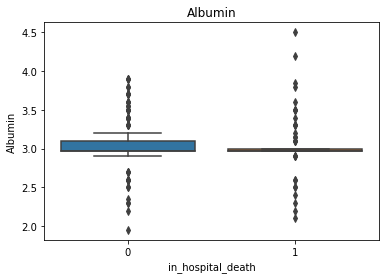

In [18]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Albumin')
plt.title('Albumin') #too many outliers in dead column

Text(0.5, 1.0, 'ALP')

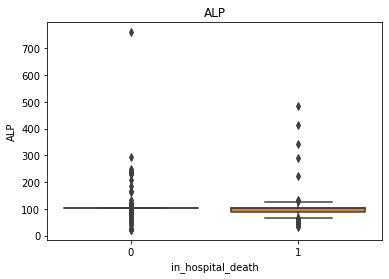

In [19]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='ALP')
plt.title('ALP') #too many outliers in alive column

Text(0.5, 1.0, 'ALT')

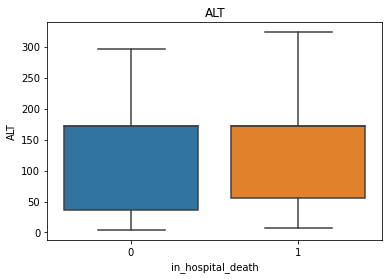

In [20]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='ALT',showfliers=False)#na
plt.title('ALT')#too identical,IQR slightly different but no median value existed, even without outliers showing

Text(0.5, 1.0, 'AST')

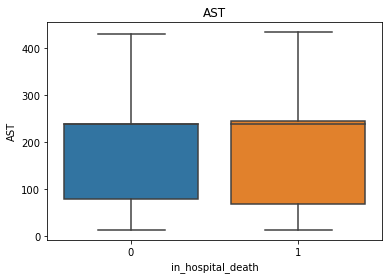

In [21]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='AST',showfliers=False)#when outliers were not showing,median did not exist for one boxplot
plt.title('AST')

Text(0.5, 1.0, 'BUN')

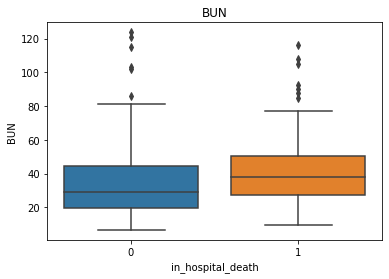

In [22]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='BUN')
plt.title('BUN')
#averages are different
#outlier presence is low
#somewhat different IQR

In [23]:
average_chem_coro[(average_chem_coro.BUN>=80)&(average_chem_coro.in_hospital_death==1)]#detecting outliers for BUN

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
1327,141577,2.300000,60.000000,26.000000,62.000000,87.666667,0.300000,118.000000,3.85,5.166667,...,0.728030,2.566667,33.777778,79.833333,139.500000,155.833333,94.712500,17.333333,7.353333,1
19,132617,2.969733,104.674194,171.898699,237.504928,107.916667,1.905911,156.648026,2.25,4.208333,...,0.548367,2.241667,30.000000,96.000000,136.333333,152.750000,95.333333,29.666667,7.550000,1
1288,141295,2.969733,104.674194,171.898699,237.504928,85.000000,1.905911,156.648026,3.00,3.700000,...,0.350000,2.350000,40.267430,142.896559,132.500000,121.500000,96.565436,20.000000,7.503998,1
390,135210,3.000000,104.674194,171.898699,237.504928,116.000000,1.905911,156.648026,5.15,5.200000,...,0.660417,2.350000,51.162500,76.375000,130.000000,221.250000,95.666667,22.500000,7.267625,1
1116,140029,3.000000,341.500000,475.000000,706.000000,90.000000,2.450000,156.648026,3.15,5.100000,...,0.548367,2.400000,30.333333,79.750000,147.250000,93.750000,96.565436,18.250000,7.394167,1
1443,142484,3.150000,104.674194,171.898699,237.504928,105.000000,1.905911,156.648026,3.20,4.500000,...,0.548367,2.750000,40.267430,142.896559,149.750000,156.250000,96.565436,24.250000,7.503998,1
360,134948,3.100000,104.674194,171.898699,237.504928,92.500000,1.905911,156.648026,1.95,3.875000,...,1.000000,2.400000,45.000000,111.000000,140.500000,119.000000,98.000000,24.500000,7.450000,1


In [24]:
average_chem_coro[(average_chem_coro.BUN>=82)&(average_chem_coro.in_hospital_death==0)]#detecting outliers for BUN

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
933,138745,3.200000,67.000000,35.500000,78.000000,120.750000,2.050000,156.648026,2.950000,4.0750,...,0.624286,2.737500,47.066667,102.983333,133.000,253.875000,95.500000,26.375,7.442833,0
1182,140607,3.600000,104.674194,171.898699,237.504928,123.750000,1.905911,156.648026,5.975000,3.7000,...,0.548367,2.650000,40.267430,142.896559,132.000,105.000000,96.565436,24.500,7.503998,0
469,135717,2.969733,233.500000,24.500000,39.500000,114.833333,1.650000,156.648026,3.266667,4.5625,...,0.548367,1.866667,35.750000,80.500000,131.625,190.125000,97.250000,22.500,7.442500,0
1061,139608,3.400000,294.000000,36.000000,29.000000,103.166667,1.100000,156.648026,3.983333,4.7500,...,0.548367,2.658333,40.267430,142.896559,134.750,157.916667,96.565436,20.750,7.503998,0
480,135788,2.969733,104.674194,171.898699,237.504928,101.750000,1.905911,156.648026,3.275000,3.6000,...,0.940000,2.175000,27.000000,53.000000,137.250,131.750000,96.565436,23.500,7.450000,0
1088,139803,2.969733,104.674194,171.898699,237.504928,85.750000,1.905911,199.000000,1.500000,3.6750,...,1.000000,2.375000,53.000000,72.000000,142.000,92.500000,96.565436,33.000,7.470000,0


Text(0.5, 1.0, 'Bilirubin')

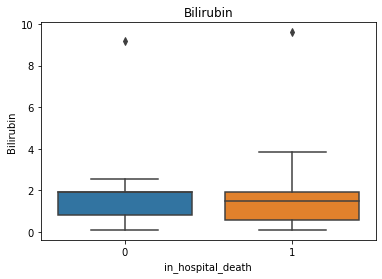

In [25]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Bilirubin')
plt.title('Bilirubin')#current studies show inconclusive correlations

Text(0.5, 1.0, 'Cholesterol')

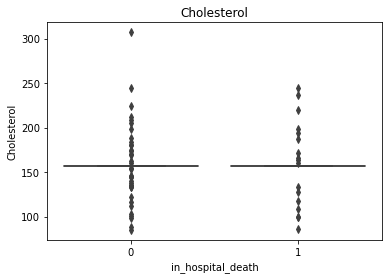

In [26]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Cholesterol')#significant proportion of values consist of outliers and average is not shown even when outliers not shown
plt.title('Cholesterol')

Text(0.5, 1.0, 'Creatinine')

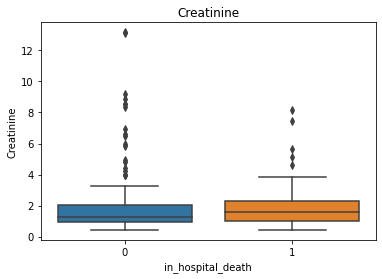

In [27]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Creatinine')#mean values had significant distinction
plt.title('Creatinine')#IQR was too similar compared to other chosen variables
#presnece of outliers on both boxplots was high

In [28]:
filter_creatinine=average_chem_coro[(average_chem_coro.Creatinine>3.8)&(average_chem_coro.in_hospital_death==0)]
#significant presence of outliers
filter_creatinine.shape

(19, 21)

In [29]:
average_chem_coro[(average_chem_coro.Creatinine>4.1)&(average_chem_coro.in_hospital_death==1)]#detecting outliers

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
878,138436,2.969733,134.000000,4940.000000,15680.000000,44.375,0.500000,156.648026,4.6000,4.2200,...,0.654167,2.216667,32.583333,116.125000,141.666667,135.333333,95.958333,16.833333,7.337083,1
294,134599,2.969733,104.674194,171.898699,237.504928,29.500,1.905911,156.648026,7.4250,4.6750,...,0.548367,1.875000,40.267430,142.896559,137.750000,136.250000,96.565436,27.750000,7.503998,1
1371,141882,2.900000,224.333333,236.833333,6232.166667,26.750,1.150000,156.648026,5.6625,5.4625,...,0.682540,1.883333,37.583333,143.229167,134.625000,238.000000,97.227273,18.375000,7.332778,1
870,138364,3.200000,130.000000,26.000000,27.000000,77.000,0.300000,160.000000,8.1750,4.1500,...,0.456250,1.975000,33.333333,146.583333,133.500000,88.250000,98.000000,18.000000,7.330000,1
390,135210,3.000000,104.674194,171.898699,237.504928,116.000,1.905911,156.648026,5.1500,5.2000,...,0.660417,2.350000,51.162500,76.375000,130.000000,221.250000,95.666667,22.500000,7.267625,1


In [30]:
average_chem_coro[(average_chem_coro.Creatinine>3.9)&(average_chem_coro.in_hospital_death==0)]#detecting outliers

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
862,138331,2.969733,116.000000,11.000000,31.000000,71.250000,2.000000,156.648026,6.475000,5.775000,...,0.548367,2.550000,40.267430,142.896559,124.250000,118.000000,96.565436,12.250000,7.503998,0
1386,141991,2.969733,104.674194,171.898699,237.504928,26.500000,1.905911,156.648026,4.200000,4.050000,...,0.800000,2.150000,40.267430,142.896559,135.000000,111.000000,96.565436,29.500000,7.503998,0
1435,142405,3.000000,104.674194,171.898699,237.504928,49.000000,1.905911,156.648026,5.820000,4.935000,...,0.661607,1.990000,41.383333,119.733333,138.100000,149.100000,96.800000,26.550000,7.379000,0
1272,141173,3.400000,184.000000,20.000000,20.000000,55.500000,0.400000,156.648026,9.166667,4.800000,...,0.548367,1.950000,40.267430,142.896559,136.166667,180.333333,96.565436,21.166667,7.503998,0
635,136813,2.969733,232.000000,6.500000,173.250000,54.833333,2.300000,156.648026,6.583333,4.633333,...,0.527273,2.250000,46.733333,114.666667,142.000000,147.166667,95.833333,26.500000,7.424667,0
222,134112,2.969733,104.674194,171.898699,237.504928,33.000000,1.905911,156.648026,8.900000,4.050000,...,0.548367,1.850000,40.267430,142.896559,136.500000,77.000000,96.565436,26.500000,7.503998,0
1301,141404,3.300000,209.000000,19.000000,18.000000,79.500000,0.200000,156.648026,13.150000,5.550000,...,0.548367,2.250000,40.267430,142.896559,139.000000,87.166667,96.565436,23.000000,7.503998,0
291,134590,3.600000,104.674194,171.898699,237.504928,45.000000,1.905911,156.648026,8.550000,4.750000,...,0.700000,2.000000,42.000000,79.000000,140.500000,135.500000,96.000000,23.500000,7.460000,0
1446,142503,2.969733,104.674194,171.898699,237.504928,59.250000,1.905911,156.648026,8.375000,5.325000,...,0.477778,2.100000,52.187500,108.000000,133.500000,165.000000,94.416667,24.000000,7.286875,0
1260,141112,2.969733,104.674194,171.898699,237.504928,37.500000,1.905911,156.648026,4.000000,5.433333,...,0.550000,2.133333,50.000000,108.000000,138.500000,144.500000,97.000000,26.500000,7.380000,0


Text(0.5, 1.0, 'K')

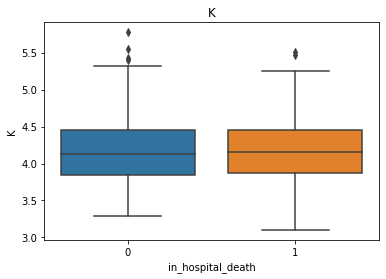

In [31]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='K') 
plt.title('K')#too similar IQR

Text(0.5, 1.0, 'Lactate')

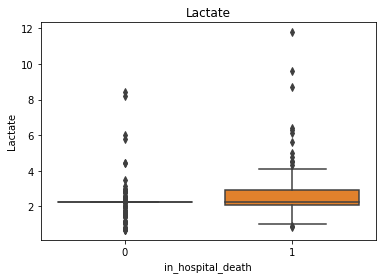

In [32]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Lactate')
plt.title('Lactate')#outliers are significantly abundanta and IQR magnitude differs drastically in an inappropriat emanner

In [33]:
average_chem_coro.Lactate.median()

2.2506124214999996

In [34]:
average_chem_coro[((average_chem_coro.Lactate<2.25)|(average_chem_coro.Lactate>2.26))&(average_chem_coro.in_hospital_death==0)]
#presence of outliers is significant despite strong correlation with in hospital death in heatmap

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
1435,142405,3.000000,104.674194,171.898699,237.504928,49.000000,1.905911,156.648026,5.820000,4.935000,...,0.661607,1.990000,41.383333,119.733333,138.100000,149.100000,96.800000,26.550000,7.379000,0
1173,140479,3.200000,89.500000,151.500000,246.500000,8.500000,0.750000,205.000000,0.575000,4.033333,...,0.637500,1.975000,35.583333,121.250000,136.000000,136.000000,91.166667,20.750000,7.390000,0
1196,140692,2.969733,109.500000,295.500000,315.000000,45.500000,2.550000,156.648026,2.050000,3.750000,...,0.548367,1.850000,36.000000,65.500000,137.000000,92.500000,96.565436,21.250000,7.380000,0
1325,141565,2.969733,104.674194,171.898699,237.504928,16.000000,1.905911,156.648026,0.625000,3.625000,...,0.570000,1.875000,41.000000,105.166667,130.250000,94.250000,94.000000,25.500000,7.383333,0
591,136534,2.969733,52.750000,105.250000,326.500000,16.500000,0.600000,156.648026,0.987500,3.700000,...,0.557143,1.862500,42.325000,131.300000,135.375000,286.625000,93.437500,20.125000,7.325750,0
635,136813,2.969733,232.000000,6.500000,173.250000,54.833333,2.300000,156.648026,6.583333,4.633333,...,0.527273,2.250000,46.733333,114.666667,142.000000,147.166667,95.833333,26.500000,7.424667,0
1385,141985,2.969733,104.674194,171.898699,237.504928,9.250000,1.905911,156.648026,0.500000,3.475000,...,0.548367,1.525000,43.000000,169.833333,132.750000,132.000000,96.500000,25.250000,7.396667,0
1054,139573,3.900000,80.000000,42.000000,43.000000,35.583333,1.600000,156.648026,1.587500,4.700000,...,1.000000,2.133333,53.000000,128.000000,137.500000,98.833333,98.000000,23.916667,7.310000,0
485,135822,2.969733,104.674194,171.898699,237.504928,15.500000,1.905911,133.000000,1.100000,4.300000,...,0.548367,1.850000,40.267430,142.896559,136.500000,103.500000,94.000000,25.000000,7.503998,0
1260,141112,2.969733,104.674194,171.898699,237.504928,37.500000,1.905911,156.648026,4.000000,5.433333,...,0.550000,2.133333,50.000000,108.000000,138.500000,144.500000,97.000000,26.500000,7.380000,0


Text(0.5, 1.0, 'FiO2')

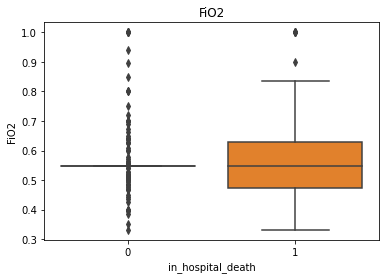

In [35]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='FiO2')
plt.title('FiO2')#similar argument to lactate

Text(0.5, 1.0, 'Mg')

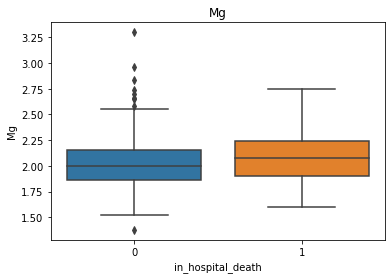

In [36]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Mg')
plt.title('Mg')
#differing average
#differing IQR

In [37]:
average_chem_coro[((average_chem_coro.Mg>2.6)|(average_chem_coro.Mg<1.50))&(average_chem_coro.in_hospital_death==0)]
#presence of outliers is not significant in alive boxplot meaning we can discount them if desired

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
1284,141279,2.969733,104.674194,171.898699,237.504928,81.000000,0.800000,156.648026,1.150000,4.475000,...,0.600000,3.300000,40.267430,142.896559,138.500000,123.750000,96.565436,27.250000,7.503998,0
933,138745,3.200000,67.000000,35.500000,78.000000,120.750000,2.050000,156.648026,2.950000,4.075000,...,0.624286,2.737500,47.066667,102.983333,133.000000,253.875000,95.500000,26.375000,7.442833,0
1374,141907,3.100000,104.674194,171.898699,237.504928,62.833333,1.905911,156.648026,3.200000,3.833333,...,0.506250,2.833333,34.208333,199.166667,134.333333,144.166667,97.857143,20.666667,7.363750,0
1361,141803,2.969733,104.674194,171.898699,237.504928,30.750000,1.905911,156.648026,1.100000,3.900000,...,0.548367,1.375000,40.267430,142.896559,141.000000,91.750000,96.565436,20.750000,7.503998,0
1182,140607,3.600000,104.674194,171.898699,237.504928,123.750000,1.905911,156.648026,5.975000,3.700000,...,0.548367,2.650000,40.267430,142.896559,132.000000,105.000000,96.565436,24.500000,7.503998,0
1061,139608,3.400000,294.000000,36.000000,29.000000,103.166667,1.100000,156.648026,3.983333,4.750000,...,0.548367,2.658333,40.267430,142.896559,134.750000,157.916667,96.565436,20.750000,7.503998,0
240,134268,3.700000,79.000000,20.000000,18.000000,33.000000,0.600000,156.648026,2.050000,3.800000,...,0.548367,2.700000,40.267430,142.896559,141.000000,111.000000,96.565436,27.000000,7.503998,0
936,138752,3.550000,93.000000,52.000000,314.000000,29.666667,0.300000,224.000000,1.375000,4.800000,...,0.640000,2.966667,34.708333,143.069444,134.000000,109.833333,96.500000,19.416667,7.365417,0


Text(0.5, 1.0, 'PaCO2')

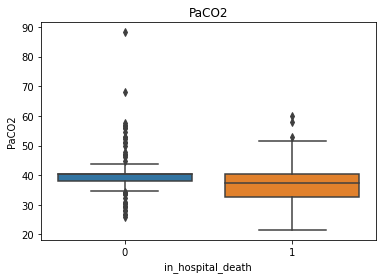

In [38]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='PaCO2') 
plt.title('PaCO2')#no differing IQR

Text(0.5, 1.0, 'PaO2')

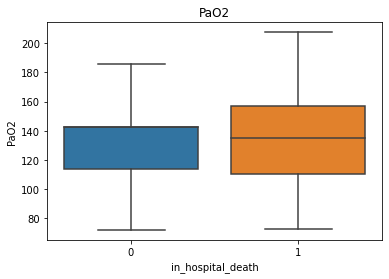

In [39]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='PaO2',showfliers=False) #na
plt.title('PaO2')#similar argument to PaCO2

Text(0.5, 1.0, 'Na')

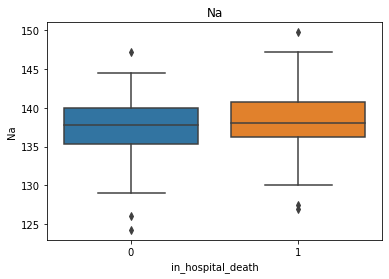

In [40]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Na') #?
plt.title('Na')#no different IQR

Text(0.5, 1.0, 'Glucose')

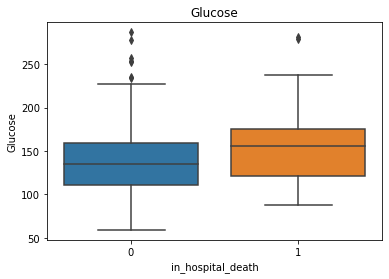

In [41]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='Glucose')
plt.title('Glucose')
#differing IQR
#different averages
#can discount outliers if desired, presence is not high

In [42]:
average_chem_coro[(average_chem_coro.Glucose>225)&(average_chem_coro.in_hospital_death==0)]

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
591,136534,2.969733,52.750000,105.250000,326.500000,16.500000,0.600000,156.648026,0.987500,3.700000,...,0.557143,1.862500,42.325000,131.300000,135.375000,286.625000,93.437500,20.125000,7.325750,0
933,138745,3.200000,67.000000,35.500000,78.000000,120.750000,2.050000,156.648026,2.950000,4.075000,...,0.624286,2.737500,47.066667,102.983333,133.000000,253.875000,95.500000,26.375000,7.442833,0
1419,142319,3.400000,104.674194,171.898699,237.504928,40.333333,1.905911,156.648026,1.766667,3.866667,...,0.425000,2.150000,30.775000,111.900000,136.166667,252.666667,96.000000,24.666667,7.485500,0
985,139126,2.969733,104.674194,171.898699,237.504928,22.000000,1.905911,134.000000,1.300000,4.200000,...,0.548367,1.675000,40.267430,142.896559,137.000000,278.000000,96.565436,28.000000,7.503998,0
700,137284,2.969733,104.674194,171.898699,237.504928,34.000000,1.905911,88.000000,1.800000,4.558333,...,0.548367,1.966667,40.267430,142.896559,138.416667,234.166667,100.000000,22.250000,7.503998,0
199,133932,2.350000,79.000000,7.000000,14.000000,17.500000,0.450000,156.648026,1.316667,4.233333,...,0.548367,1.983333,40.267430,142.896559,134.833333,225.166667,96.565436,24.000000,7.503998,0
868,138349,2.969733,118.000000,379.500000,164.500000,43.500000,0.350000,188.000000,1.150000,4.150000,...,0.331389,1.950000,43.033333,133.200000,137.500000,257.500000,97.750000,23.000000,7.355333,0
396,135228,3.500000,104.674194,171.898699,237.504928,37.583333,1.905911,156.648026,2.125000,3.400000,...,0.700000,2.000000,40.267430,142.896559,143.333333,235.500000,96.565436,20.916667,7.503998,0
666,136993,3.150000,104.674194,171.898699,237.504928,25.500000,1.905911,156.648026,0.750000,3.675000,...,1.000000,1.975000,40.267430,142.896559,136.750000,227.500000,96.565436,20.250000,7.503998,0


In [43]:
average_chem_coro[(average_chem_coro.Glucose>250)&(average_chem_coro.in_hospital_death==1)]

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
570,136407,3.0,65.000000,130.000000,434.000000,32.583333,0.500000,156.648026,1.95,4.633333,...,0.595455,2.025,36.272727,115.575758,132.25,279.25,96.035714,17.25,7.316364,1
327,134758,3.1,104.674194,171.898699,237.504928,18.750000,1.905911,156.648026,0.90,4.125000,...,0.600000,1.900,32.625000,167.375000,136.50,281.25,99.000000,19.50,7.391250,1


Text(0.5, 1.0, 'SaO2')

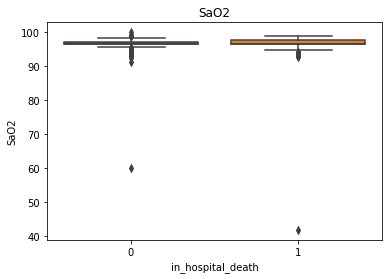

In [44]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='SaO2') #na
plt.title('SaO2')#no differing IQR that was appropriate

Text(0.5, 1.0, 'HCO3')

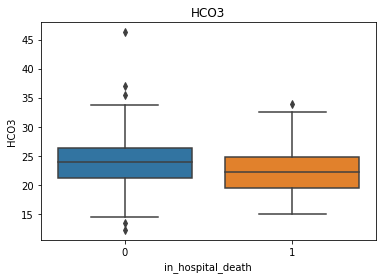

In [45]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='HCO3')
plt.title('HCO3')#no differing IQR that was appropriate

Text(0.5, 1.0, 'pH')

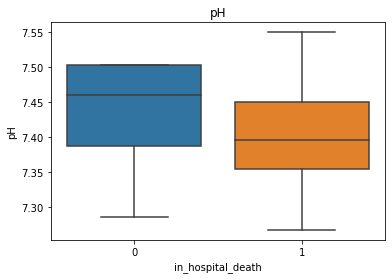

In [46]:
sns.boxplot(data=average_chem_coro,x='in_hospital_death',y='pH',showfliers=False) 
plt.title('pH')#human pH is monitored between 7.35 and 7.45. Anything above or below indicates that a patient should be in a critical condition according to research.

In [47]:
#split training and testing set for BUN
X = average_chem_coro[["BUN"]]
Y = average_chem_coro['in_hospital_death'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

#fit training model
logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 
#logistic graph properties
print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

pred_probs_BUN = logistic.predict_proba(X_train) 
pred_probs_BUN = pd.DataFrame(pred_probs_BUN)

Intercept is [-1.22]
Coefficients are [[0.01]]


In [48]:
pred_probs_BUN["class"] = np.where(pred_probs_BUN[1] > 0.5, 1, 0)#created dummy column containining binary variables that categorised each test patient into survival or death by probability
pred_probs_BUN["true"] = Y_train.reset_index().in_hospital_death#converted to informal boolean using binary classification
print('the training accuracy score of BUN is',accuracy_score(pred_probs_BUN['true'],pred_probs_BUN['class']))

the training accuracy score of BUN is 0.6632124352331606


In [49]:
pred_probs_BUN
#0 column is survival probability for patients in test set
#1 column is death probability for patients in test set
#class is dummy column classifying whether patients have over or under 0.5 probability of death
#true column is dummy column affirming whether the prediction shown in class is true or not

,0,1,class,true
0,0.669802,0.330198,0,1
1,0.521339,0.478661,0,1
2,0.529016,0.470984,0,1
3,0.736424,0.263576,0,0
4,0.681941,0.318059,0,1
...,...,...,...,...
188,0.719355,0.280645,0,0
189,0.753956,0.246044,0,0
190,0.643905,0.356095,0,0
191,0.713518,0.286482,0,0


In [50]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().in_hospital_death
print('the test accuracy score of BUN is',accuracy_score(test_preds['true'],test_preds['test_class']))
#quantifies accuracy by proportion of correct predicitons made

the test accuracy score of BUN is 0.6326530612244898


In [51]:
X = average_chem_coro[["Glucose"]]
Y = average_chem_coro['in_hospital_death'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

pred_probs_Glucose = logistic.predict_proba(X_train) 
pred_probs_Glucose = pd.DataFrame(pred_probs_Glucose)

Intercept is [-1.75]
Coefficients are [[0.01]]


In [52]:
pred_probs_Glucose["class"] = np.where(pred_probs_Glucose[1] > 0.5, 1, 0)
pred_probs_Glucose["true"] = Y_train.reset_index().in_hospital_death
print('the training accuracy score of glucose is', accuracy_score(pred_probs_Glucose['true'],pred_probs_Glucose['class']))

the training accuracy score of glucose is 0.6839378238341969


In [53]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().in_hospital_death
print('the test accuracy score of glucose is', accuracy_score(test_preds['true'],test_preds['test_class']))

the test accuracy score of glucose is 0.5918367346938775


In [54]:
X = average_chem_coro[["Mg"]]
Y = average_chem_coro['in_hospital_death'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

pred_probs_Mg = logistic.predict_proba(X_train) 
pred_probs_Mg = pd.DataFrame(pred_probs_Mg)

Intercept is [-1.08]
Coefficients are [[0.16]]


In [55]:
pred_probs_Mg["class"] = np.where(pred_probs_Mg[1] > 0.5, 1, 0)
pred_probs_Mg["true"] = Y_train.reset_index().in_hospital_death
print('the training accuracy score of Mg is',accuracy_score(pred_probs_Mg['true'],pred_probs_Mg['class']))

the training accuracy score of Mg is 0.6787564766839378


In [56]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().in_hospital_death
print('the test accuracy score of Mg model is',accuracy_score(test_preds['true'],test_preds['test_class']))

the test accuracy score of Mg model is 0.6122448979591837


In [57]:
X = average_chem_coro[["ALT"]]
Y = average_chem_coro['in_hospital_death'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

pred_probs_ALT = logistic.predict_proba(X_train) 
pred_probs_ALT = pd.DataFrame(pred_probs_ALT)

Intercept is [-1.41]
Coefficients are [[0.]]


In [58]:
pred_probs_ALT["class"] = np.where(pred_probs_ALT[1] > 0.5, 1, 0)
pred_probs_ALT["true"] = Y_train.reset_index().in_hospital_death
print('the training accuracy score of ALT is',accuracy_score(pred_probs_ALT['true'],pred_probs_ALT['class']))

the training accuracy score of ALT is 0.7202072538860104


In [59]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().in_hospital_death
print('the test accuracy score of ALT model is',accuracy_score(test_preds['true'],test_preds['test_class']))

the test accuracy score of ALT model is 0.6530612244897959


In [60]:
X = average_chem_coro[["ALP"]]
Y = average_chem_coro['in_hospital_death'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

pred_probs_ALP = logistic.predict_proba(X_train) 
pred_probs_ALP = pd.DataFrame(pred_probs_ALP)

Intercept is [-0.74]
Coefficients are [[-0.]]


In [61]:
pred_probs_ALP["class"] = np.where(pred_probs_ALP[1] > 0.5, 1, 0)
pred_probs_ALP["true"] = Y_train.reset_index().in_hospital_death
print('the training accuracy score of ALP is',accuracy_score(pred_probs_ALP['true'],pred_probs_ALP['class']))

the training accuracy score of ALP is 0.6787564766839378


In [62]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().in_hospital_death
print('the test accuracy score of ALP model is',accuracy_score(test_preds['true'],test_preds['test_class']))

the test accuracy score of ALP model is 0.6122448979591837


In [63]:
X = average_chem_coro[["AST"]]
Y = average_chem_coro['in_hospital_death'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

pred_probs_AST = logistic.predict_proba(X_train) 
pred_probs_AST = pd.DataFrame(pred_probs_AST)

Intercept is [-1.38]
Coefficients are [[0.]]


In [64]:
pred_probs_AST["class"] = np.where(pred_probs_AST[1] > 0.5, 1, 0)
pred_probs_AST["true"] = Y_train.reset_index().in_hospital_death
print('the training accuracy score of AST is',accuracy_score(pred_probs_AST['true'],pred_probs_AST['class']))

the training accuracy score of AST is 0.7253886010362695


In [65]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().in_hospital_death
print('the test accuracy score of AST model is',accuracy_score(test_preds['true'],test_preds['test_class']))

the test accuracy score of AST model is 0.7142857142857143


In [66]:
X = average_chem_coro[["Lactate"]]
Y = average_chem_coro['in_hospital_death'] 

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 

logistic = LogisticRegression(fit_intercept=True) 
logistic.fit(X_train,Y_train) 

print("Intercept is",np.round(logistic.intercept_,2))
print("Coefficients are",np.round(logistic.coef_, 2))

pred_probs_Lactate = logistic.predict_proba(X_train) 
pred_probs_Lactate = pd.DataFrame(pred_probs_Lactate)

Intercept is [-1.35]
Coefficients are [[0.24]]


In [67]:
pred_probs_Lactate["class"] = np.where(pred_probs_Lactate[1] > 0.5, 1, 0)
pred_probs_Lactate["true"] = Y_train.reset_index().in_hospital_death
print('the training accuracy score of Lactate is',accuracy_score(pred_probs_Lactate['true'],pred_probs_Lactate['class']))

the training accuracy score of Lactate is 0.6735751295336787


In [68]:
test_preds = logistic.predict_proba(X_test)
test_preds = pd.DataFrame(test_preds)
test_preds['test_class'] = np.where(test_preds[1] > 0.5, 1, 0)
test_preds["true"] = Y_test.reset_index().in_hospital_death
print('the test accuracy score of Lactate model is',accuracy_score(test_preds['true'],test_preds['test_class']))

the test accuracy score of Lactate model is 0.6938775510204082


<AxesSubplot:xlabel='BUN', ylabel='in_hospital_death'>

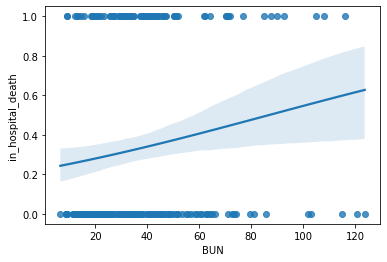

In [69]:
sns.regplot(data=average_chem_coro,x='BUN',y='in_hospital_death',logistic=True)
#created logistic regplor of each chosen variable to affirm conclusion
#chose not to include in presentation as all graph features or functions were not clear 

<AxesSubplot:xlabel='Glucose', ylabel='in_hospital_death'>

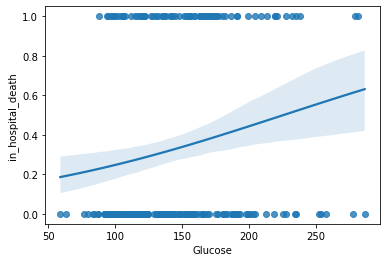

In [70]:
sns.regplot(data=average_chem_coro,x='Glucose',y='in_hospital_death',logistic=True)

<AxesSubplot:xlabel='Mg', ylabel='in_hospital_death'>

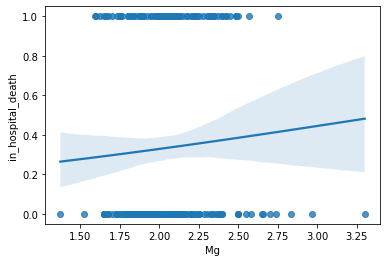

In [71]:
sns.regplot(data=average_chem_coro,x='Mg',y='in_hospital_death',logistic=True)

<AxesSubplot:xlabel='Lactate', ylabel='in_hospital_death'>

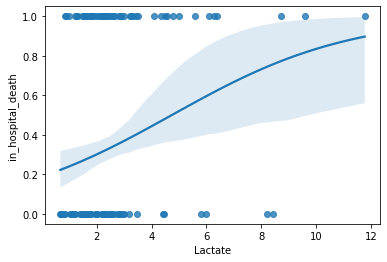

In [72]:
sns.regplot(data=average_chem_coro,x='Lactate',y='in_hospital_death',logistic=True)
#strong regression line but too many outliers

In [73]:
dead=average_chem_coro[(average_chem_coro.in_hospital_death==1)]
alive=average_chem_coro[(average_chem_coro.in_hospital_death==0)]
alive.describe()#numerical summary of results

,RecordID,Albumin,ALP,ALT,AST,BUN,Bilirubin,Cholesterol,Creatinine,K,...,FiO2,Mg,PaCO2,PaO2,Na,Glucose,SaO2,HCO3,pH,in_hospital_death
count,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,...,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.000000,161.0
mean,137509.360248,3.049409,108.924825,124.621609,178.684493,34.676549,1.519016,156.985759,1.998510,4.175062,...,0.573307,2.038434,40.409940,137.375771,137.441237,140.381138,96.466274,24.196562,7.499111,0.0
std,3153.590867,0.307084,64.041421,73.216405,105.587193,22.208847,0.887093,21.840645,2.139482,0.449014,...,0.119683,0.267710,7.043939,42.605660,3.582933,41.796887,3.097865,4.414667,0.722395,0.0
min,132547.000000,1.950000,21.000000,4.000000,12.500000,6.500000,0.100000,85.000000,0.450000,3.283333,...,0.331389,1.375000,26.000000,53.000000,124.250000,59.000000,60.000000,12.250000,7.286875,0.0
25%,134590.000000,2.969733,104.000000,36.000000,78.000000,19.750000,0.800000,156.648026,0.925000,3.850000,...,0.548367,1.862500,38.000000,114.000000,135.333333,111.000000,96.565436,21.250000,7.387500,0.0
50%,137454.000000,2.969733,104.674194,171.898699,237.504928,29.000000,1.905911,156.648026,1.233333,4.125000,...,0.548367,2.000000,40.267430,142.896559,137.750000,134.500000,96.565436,23.916667,7.460000,0.0
75%,140311.000000,3.100000,104.674194,171.898699,237.504928,44.333333,1.905911,156.648026,2.025000,4.450000,...,0.548367,2.150000,40.267430,142.896559,140.000000,158.750000,97.250000,26.375000,7.503998,0.0
max,142659.000000,3.900000,760.000000,379.500000,749.500000,123.750000,9.200000,307.000000,13.166667,5.775000,...,1.000000,3.300000,88.166667,365.000000,147.250000,286.625000,100.000000,46.250000,16.570500,0.0
